#Goal: Look through dataframe and find information to figure out how the data can be used for clustering and classification.

In [1]:
# Load the data into a pandas dataframe
import pandas as pd
df = pd.read_csv('cancer_data.csv')

df.head()

,subject_id,race,sex,age_at_diagnosis,morphology,primary_diagnosis,primary_diagnosis_condition,primary_diagnosis_site,vital_status,treatment_type
0,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Chemotherapy
1,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Immunotherapy (Including Vaccines)
2,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Surgery, NOS"
3,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,Targeted Molecular Therapy
4,HCMI.HCM-BROD-0002-C71,white,male,24213,9442/3,Gliosarcoma,Gliomas,Brain,Dead,"Radiation Therapy, NOS"


In [2]:
# Display the dataframe attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   subject_id                   14552 non-null  object
 1   race                         14552 non-null  object
 2   sex                          14552 non-null  object
 3   age_at_diagnosis             14552 non-null  int64 
 4   morphology                   14552 non-null  object
 5   primary_diagnosis            14552 non-null  object
 6   primary_diagnosis_condition  14552 non-null  object
 7   primary_diagnosis_site       14552 non-null  object
 8   vital_status                 14552 non-null  object
 9   treatment_type               14552 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [3]:
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values in '{column}':")
  print(df[column].value_counts())
  print("\n")  # Add space between outputs for readability

Unique values in 'subject_id':
subject_id
HCMI.HCM-CSHL-0655-C50    12
HCMI.HCM-BROD-0611-C71    10
HCMI.HCM-BROD-0676-C71    10
HCMI.HCM-BROD-0681-C71    10
HCMI.HCM-BROD-0783-C71    10
                          ..
TCGA.TCGA-12-0653          2
TCGA.TCGA-RQ-A68N          2
TCGA.TCGA-RQ-AAAT          2
TCGA.TCGA-FA-A7DS          2
TCGA.TCGA-FX-A3RE          2
Name: count, Length: 3576, dtype: int64


Unique values in 'race':
race
white                                        12353
black or african american                     1703
asian                                          462
american indian or alaska native                30
native hawaiian or other pacific islander        4
Name: count, dtype: int64


Unique values in 'sex':
sex
female    9469
male      5083
Name: count, dtype: int64


Unique values in 'age_at_diagnosis':
age_at_diagnosis
32872    45
23150    14
19030    12
23273    12
22341    12
         ..
20087     2
14958     2
23757     2
23178     2
23952     2
Name: count,

In [4]:
columns_to_filter = ['treatment_type', 'primary_diagnosis_condition', 'primary_diagnosis']

categories_to_remove = set()

# Loop through each specified column to collect categories with frequency < 100
for column in columns_to_filter:
    # Get value counts for the column
    value_counts = df[column].value_counts()

    # Identify values that appear less than 100 times
    low_frequency_values = value_counts[value_counts < 100].index

    # Add low frequency values to the set
    categories_to_remove.update(low_frequency_values)

for column in columns_to_filter:
    df = df[~df[column].isin(categories_to_remove)]

In [5]:
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values in '{column}':")
  print(df[column].value_counts())
  print("\n")  # Add space between outputs for readability

Unique values in 'subject_id':
subject_id
TCGA.TCGA-AO-A03O         6
TCGA.TCGA-AO-A0J9         6
TCGA.TCGA-AO-A12E         6
TCGA.TCGA-AO-A12D         6
TCGA.TCGA-AO-A12B         6
                         ..
HCMI.HCM-BROD-0420-C71    1
HCMI.HCM-BROD-0421-C71    1
HCMI.HCM-BROD-0455-C71    1
HCMI.HCM-BROD-0613-C71    1
HCMI.HCM-BROD-0003-C71    1
Name: count, Length: 3444, dtype: int64


Unique values in 'race':
race
white                                        11855
black or african american                     1554
asian                                          433
american indian or alaska native                30
native hawaiian or other pacific islander        4
Name: count, dtype: int64


Unique values in 'sex':
sex
female    8938
male      4938
Name: count, dtype: int64


Unique values in 'age_at_diagnosis':
age_at_diagnosis
32872    37
23150    14
28433    12
22220    12
21183    12
         ..
22936     1
19673     1
19807     1
19996     1
29995     1
Name: count, Length: 31

Visualize the data based on classes. We'll have our class be vital_status (dead or alive)

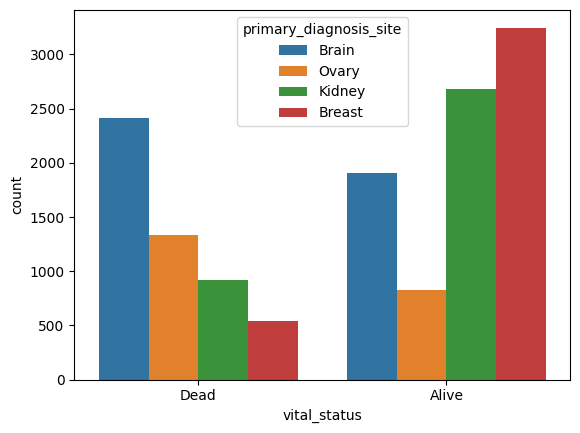

In [6]:
# Visualize the number of instances which are dead or alive (vital_status) based on cancer type (primary_diagnosis_site)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='vital_status', hue='primary_diagnosis_site', data=df)
plt.show()

We can see some trends here, where people with brain cancer tend to have a lower survival rate, and people with breast cancer have a high survival rate.

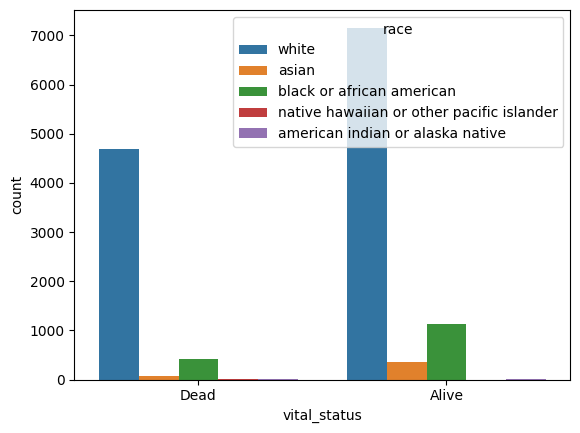

In [7]:
# Visualize the number of instances which are dead or alive (vital_status) based on race
sns.countplot(x='vital_status', hue='race', data=df)
plt.show()

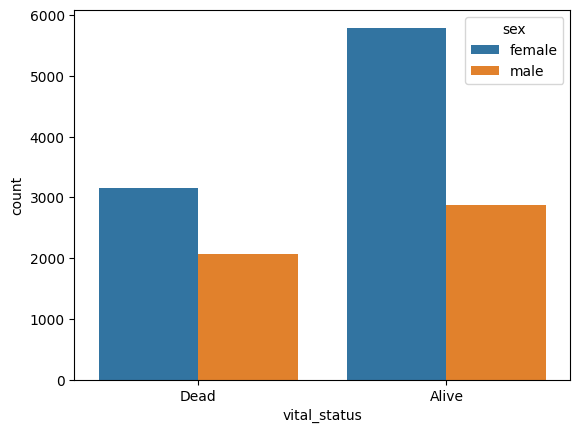

In [8]:
# Visualize the number of instances which are dead or alive (vital_status) based on sex
sns.countplot(x='vital_status', hue='sex', data=df)
plt.show()

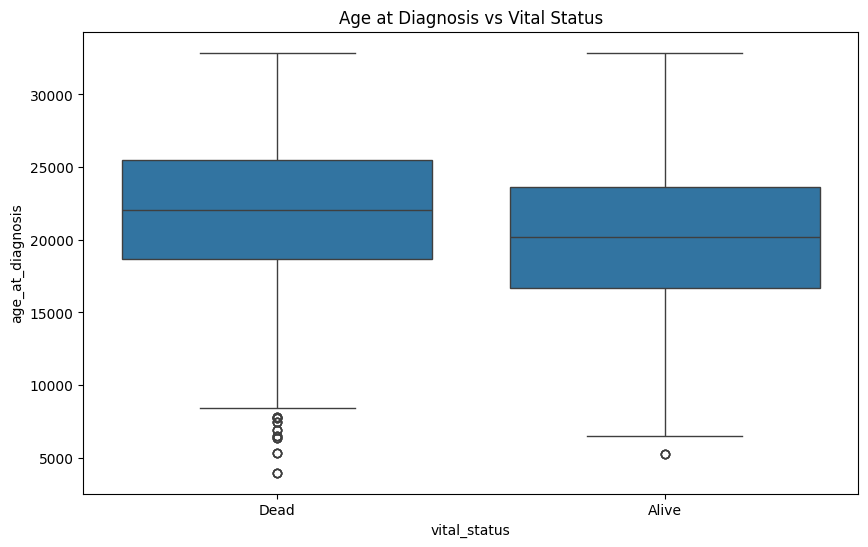

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='vital_status', y='age_at_diagnosis', data=df)
plt.title('Age at Diagnosis vs Vital Status')
plt.show()

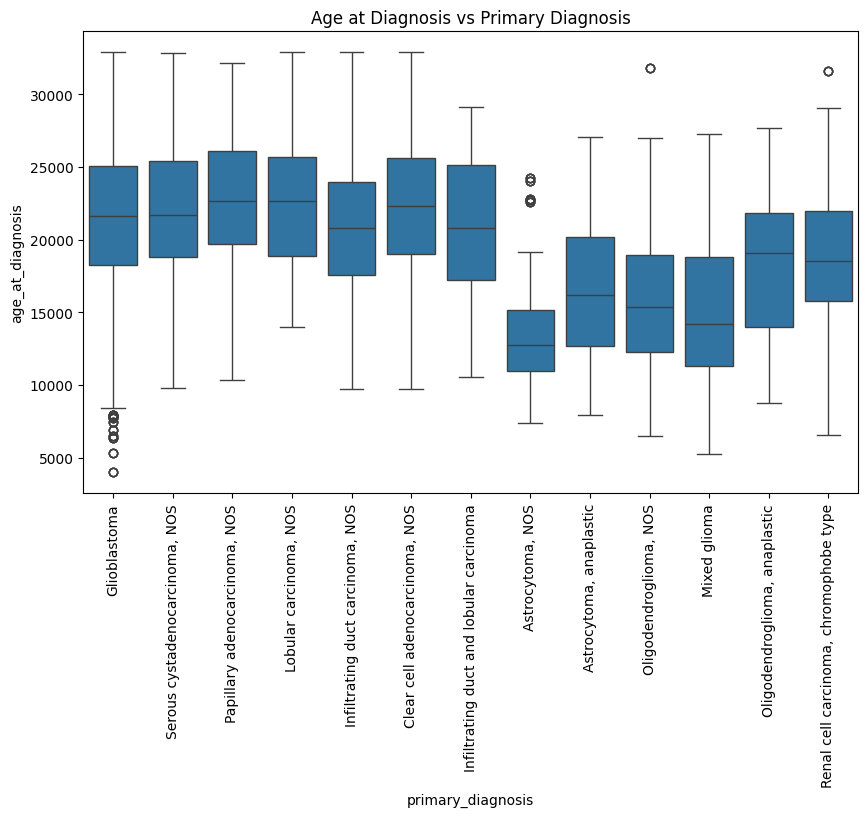

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_diagnosis', y='age_at_diagnosis', data=df)
plt.title('Age at Diagnosis vs Primary Diagnosis')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

# One-Hot Encode the categorical variables
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df[['race', 'sex', 'primary_diagnosis', 'primary_diagnosis_site', 'vital_status', 'treatment_type']])

# Turn encoded_data back into a pandas dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())

encoded_df.head()

,race_american indian or alaska native,race_asian,race_black or african american,race_native hawaiian or other pacific islander,race_white,sex_female,sex_male,"primary_diagnosis_Astrocytoma, NOS","primary_diagnosis_Astrocytoma, anaplastic","primary_diagnosis_Clear cell adenocarcinoma, NOS",...,"primary_diagnosis_Renal cell carcinoma, chromophobe type","primary_diagnosis_Serous cystadenocarcinoma, NOS",primary_diagnosis_site_Brain,primary_diagnosis_site_Breast,primary_diagnosis_site_Kidney,primary_diagnosis_site_Ovary,vital_status_Alive,vital_status_Dead,"treatment_type_Pharmaceutical Therapy, NOS","treatment_type_Radiation Therapy, NOS"
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [21]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_data)

# Store pca_result as a pandas dataframe
pca_result = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_result.head()

,PC1,PC2
0,-0.629469,1.110719
1,-1.485982,0.493132
2,-0.629469,1.110719
3,-1.485982,0.493132
4,-0.629469,1.110719
